In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
d = pd.read_csv("Data_WM.csv")

In [3]:
d

,AADF,PedalCycle,MotorCycle,CarTaxies,BusCoaches
0,2000,79920,222525,26956216,367302
1,2001,78138,232931,27309361,377048
2,2002,73433,237346,27695209,353026
3,2003,73426,267168,27509617,322425
4,2004,61833,225081,28108929,293387
5,2005,54449,214996,28135045,297896
6,2006,75335,213851,28273059,300005
7,2007,51618,212727,28132190,287112
8,2008,63598,205438,27845252,270097
9,2009,72132,210086,28232917,274654


In [4]:
len(d)

18

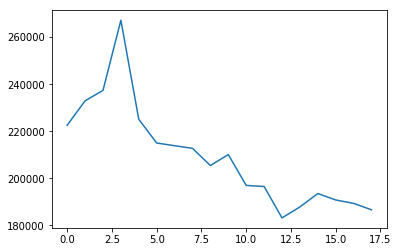

In [5]:
plt.plot(d.MotorCycle)

In [6]:
import time, random, os
import sc3nb as scn

<IPython.core.display.Javascript object>

In [12]:
sc = scn.startup()  # optionally use argument sclangpath="/path/to/your/sclang"


Starting sclang...
Done.
Registering UDP callback...
Done.
Sclang started on non default port: 57126
Booting server...
Done.
-> sc3nb started


In [13]:
%%sc 
SynthDef ("bus", {arg out=0, freqb= 50, mul=0.7, ampb = 0.2;
    var f;
    f = Saw.ar(freqb,mul,0);
    Out.ar(out,f*ampb);
}).add;

In [14]:
%sc g= Synth.new(\bus)

In [15]:
%sc g.free

In [16]:
%sc m=Synth.new("s2", [\amp, 0.04])

In [17]:
%sc m.free

In [18]:
%%sc
SynthDef ("car", {arg out=0, freqc = 2.5, mul2= 10, ampc = 1;
    var f;
    f = LFPulse.ar(LFPulse.kr(freqc, 0, 0.3, mul2, 200), 0, 0.8, 0.1);
    Out.ar(out,f*ampc);
}).add;

In [19]:
%sc f= Synth.new(\car)

In [20]:
%sc f.free

In [21]:
%%sc
SynthDef("motorbike", { arg out=0, freqm= 30, mul3 = 100, ampm = 1;
    var m;
    m = RLPF.ar(LFPulse.ar(SinOsc.ar(10, 0, 0, 10),0.5, 0.2),freqm,0.5,100);
    Out.ar(out, m*ampm);
}).add;

In [22]:
%sc e = Synth.new(\motorbike)
%sc 

In [23]:
%sc e.free

In [24]:
queue = scn.TimedQueue()

In [27]:
t0 = time.time()
delay = 0.2



# instantiate synths
#queue.put(t0+delay, sc.msg, ("/s_new", ["bus", 1234, 1, 1]))
#queue.put(t0+delay, sc.msg, ("/s_new", ["car", 1235, 1, 1]))
queue.put(t0+delay, sc.msg, ("/s_new", ["motorbike", 1236, 1, 1]))

sc.prepare_for_record(0, "my_recording.wav", 99, 2, "wav", "int16")  # buffer 99 will be used
sc.record(t0+0.1, 2001)  # recording starts in 200 ms
#sc.bundle(0.2, "/s_new", ["car", 1234, 1, 1]) 
sc.stop_recording(t0+10) # and stops in 1 seconds

# modulate with data while playing through time
for i in range (len(d)):
    onset = scn.linlin(i, 0, 18, 0, 9)
    #b_freq= scn.linlin((d.iloc[i][4]), min(d.BusCoaches),max(d.BusCoaches), 10, 100)
    #print(b_freq)
    #b_amp = scn.linlin((d.iloc[i][4]), min(d.BusCoaches),max(d.BusCoaches), 0.2, 10)
    #print(b_amp)
    #c_freq= scn.linlin((d.iloc[i][3]), min(d.CarTaxies),max(d.CarTaxies), 0.2,15)
    #c_amp= scn.linlin((d.iloc[i][3]), min(d.CarTaxies),max(d.CarTaxies), 0.2,10)
    m_freq = scn.linlin((d.iloc[i][2]), min(d.MotorCycle),max(d.MotorCycle), 30,300)
    m_amp = scn.linlin((d.iloc[i][2]), min(d.MotorCycle),max(d.MotorCycle), 0.2,10)
    #queue.put(t0 + delay + onset, sc.msg, ("/n_set",
        #[1234,'freqb', b_freq,'ampb',b_amp]))
    #queue.put(t0 + delay + onset, sc.msg, ("/n_set", 
     #   [1235, 'freqc', c_freq,'ampc',c_amp]))    
    queue.put(t0 + delay + onset, sc.msg, ("/n_set", 
        [1236, 'freqm',m_freq,'ampm', m_amp]))
           
    
# shut down synth when finished
#queue.put(t0 + delay + onset, sc.msg, ("/n_free", 1234))
#queue.put(t0 + delay + onset, sc.msg, ("/n_free", 1235))
queue.put(t0 + delay + onset, sc.msg, ("/n_free", 1236))

In [ ]:
plt.plot(d.CarTaxies)
plt.xlim(0,18)

In [ ]:
print(mul2)